# Employer Review Prediction
## Reynara Ezra Pratama

## Background

## Business Understanding

1. Mengetahui *review* yang diberikan oleh pegawai terhadap perusahaan.
2. Memprediksi *review* yang diberikan dan mengkategorikannya ke dalam *review* yang bersifat positif, netral, atau negatif.

## Data Understanding

1. `ReviewTitle` : Topik dari *review*.
2. `CompleteReview` : *Review* yang diberikan pegawai perusahaan.
3. `URL` : *Uniform Resource Locator*.
4. `Rating` : Penilaian yang diberikan pegawai perusahaan.
5. `ReviewDetails` : Detail mengenai *review*.

## Import Library

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import tensorflow as tf
import nltk

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings 
warnings.filterwarnings('ignore')

## Loading Dataset

**Load Data From Github**

In [2]:
# url = "https://raw.githubusercontent.com/ReynaraEzra/Employer-Review/main/data_input/results.json"
# df = pd.read_json(url)

**Load Data From Local File**

In [3]:
df = pd.read_json('data_input/results.json')

## Checking Dataset

In [4]:
df.head()

ReviewTitle  \
0                       Productive   
1                        Stressful   
2  Good Company for Every employee   
3                       Productive   
4                   Non productive   

                                      CompleteReview  \
0  Good company, cool workplace, work load little...   
1  1. Need to work on boss's whims and fancies 2....   
2  Good company for every Engineers dream, Full M...   
3  I am just pass out bsc in chemistry Typical da...   
4  Not so fun at work just blame games  Target pe...   

                                                 URL  Rating  \
0  https://in.indeed.com/cmp/Reliance-Industries-...       3   
1  https://in.indeed.com/cmp/Reliance-Industries-...       3   
2  https://in.indeed.com/cmp/Reliance-Industries-...       5   
3  https://in.indeed.com/cmp/Reliance-Industries-...       5   
4  https://in.indeed.com/cmp/Reliance-Industries-...       1   

                                       ReviewDetails  
0  (Current Employee)  -  Ghansoli  -  August 30,...  
1          (Former Employee)  -   -  August 26, 2021  
2          (Former Employee)  -   -  August 17, 2021  
3         (Current Employee)  -   -  August 17, 2021  
4           (Former Employee)  -   -  August 9, 2021

In [5]:
df.tail()

ReviewTitle  \
145204  Definitely very good place to work and can hav...   
145205  IT Services Company; Great scope for improvement.   
145206  Productive, fun to work, great place to do cer...   
145207                   Great place to start the career.   
145208                                 Nice place to work   

                                           CompleteReview  \
145204  We get a lot to learn in the company. Very sys...   
145205  Lot of scope to learn different technologies u...   
145206  An overall positive experience, nice environme...   
145207  Happy that I've started my career from such a ...   
145208  Got good experience and knowledge about my wor...   

                                                      URL  Rating  \
145204  https://in.indeed.com/cmp/Tata-Consultancy-Ser...       4   
145205  https://in.indeed.com/cmp/Tata-Consultancy-Ser...       4   
145206  https://in.indeed.com/cmp/Tata-Consultancy-Ser...       4   
145207  https://in.indeed.com/cmp/Tata-Consultancy-Ser...       3   
145208  https://in.indeed.com/cmp/Tata-Consultancy-Ser...       5   

                                      ReviewDetails  
145204   (Former Employee)  -   -  January 20, 2012  
145205   (Former Employee)  -   -  January 19, 2012  
145206   (Former Employee)  -   -  January 19, 2012  
145207    (Former Employee)  -   -  January 7, 2012  
145208  (Former Employee)  -   -  December 19, 2011

In [6]:
df.sample(5)

ReviewTitle  \
42735                                          Productive   
2038                                      Worst workplace   
38268   Attractive Compensation & Benefits however too...   
119020                                         productive   
132197                 Great Company to start your career   

                                           CompleteReview  \
42735   Great place to learn. I worked under commercia...   
2038    Worked as Accounts receivable associate and al...   
38268   Good compensation structure. Company offers go...   
119020  very challenging work place and good work envi...   
132197  I worked at Infosys full-time (More than 3 yea...   

                                                      URL  Rating  \
42735   https://in.indeed.com/cmp/Deutsche-Bank/review...       5   
2038    https://in.indeed.com/cmp/Marriott-Internation...       2   
38268      https://in.indeed.com/cmp/Ey/reviews?start=460       4   
119020  https://in.indeed.com/cmp/Accenture/reviews?st...       4   
132197  https://in.indeed.com/cmp/Infosys/reviews?star...       4   

                                        ReviewDetails  
42735         (Former Employee)  -   -  July 11, 2019  
2038      (Former Employee)  -   -  December 24, 2019  
38268        (Current Employee)  -   -  March 7, 2019  
119020      (Former Employee)  -   -  August 19, 2016  
132197  (Former Employee)  -  India  -  June 18, 2015

## Check Characteristic Data

**Data Shape**

In [7]:
df.shape

(145209, 5)

**Data Columns**

In [8]:
df.columns

Index(['ReviewTitle', 'CompleteReview', 'URL', 'Rating', 'ReviewDetails'], dtype='object')

**Data Info**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145209 entries, 0 to 145208
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ReviewTitle     145209 non-null  object
 1   CompleteReview  145209 non-null  object
 2   URL             145209 non-null  object
 3   Rating          145209 non-null  int64 
 4   ReviewDetails   145209 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.5+ MB


**Descriptive Statistic**

In [10]:
df.describe()

Rating
count  145209.000000
mean        4.053661
std         0.925805
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000

**Check Missing Value**

In [11]:
df.isnull().sum()

ReviewTitle       0
CompleteReview    0
URL               0
Rating            0
ReviewDetails     0
dtype: int64

**Check and Drop Duplicate Data**

In [12]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop=True, inplace=True)

In [13]:
df.shape

(145191, 5)

## Feature Extraction

In [14]:
df.head(3)

ReviewTitle  \
0                       Productive   
1                        Stressful   
2  Good Company for Every employee   

                                      CompleteReview  \
0  Good company, cool workplace, work load little...   
1  1. Need to work on boss's whims and fancies 2....   
2  Good company for every Engineers dream, Full M...   

                                                 URL  Rating  \
0  https://in.indeed.com/cmp/Reliance-Industries-...       3   
1  https://in.indeed.com/cmp/Reliance-Industries-...       3   
2  https://in.indeed.com/cmp/Reliance-Industries-...       5   

                                       ReviewDetails  
0  (Current Employee)  -  Ghansoli  -  August 30,...  
1          (Former Employee)  -   -  August 26, 2021  
2          (Former Employee)  -   -  August 17, 2021

**Make Company Name Columns**

In [15]:
df['Company Name'] = df['URL'].str.split('/')
df['Company Name'] = df['Company Name'].str[4]

In [16]:
df['Company Name'].head()

0    Reliance-Industries-Ltd
1    Reliance-Industries-Ltd
2    Reliance-Industries-Ltd
3    Reliance-Industries-Ltd
4    Reliance-Industries-Ltd
Name: Company Name, dtype: object

In [17]:
df['Company Name'].unique()

array(['Reliance-Industries-Ltd', 'Mphasis', 'Kpmg', 'Yes-Bank',
       'Sutherland', 'Marriott-International,-Inc.', 'DHL', 'Jio',
       'Vodafoneziggo', 'HP', 'Maersk', 'Ride.swiggy', 'Jll', 'Alstom',
       'UnitedHealth-Group', 'Tata-Consultancy-Services-(tcs)',
       'Capgemini', 'Teleperformance', 'Cognizant-Technology-Solutions',
       'Mahindra-&-Mahindra-Ltd', 'L&T-Technology-Services-Ltd.',
       'Bharti-Airtel-Limited', 'Indeed', 'Hyatt',
       'Icici-Prudential-Life-Insurance', 'Accenture', 'Honeywell',
       'Standard-Chartered-Bank', 'Nokia', 'Apollo-Hospitals',
       'Tata-Aia-Life', 'Hdfc-Bank', 'Bosch', 'Deloitte', 'Ey',
       'Microsoft', 'Barclays', 'JPMorgan-Chase', 'Muthoot-Finance',
       'Wns-Global-Services', 'Kotak-Mahindra-Bank', 'Infosys', 'Oracle',
       "Byju's", 'Deutsche-Bank', 'Hinduja-Global-Solutions', 'Ericsson',
       'Axis-Bank', 'IBM', 'Concentrix', 'Wells-Fargo', 'Google',
       'Dell-Technologies', 'Facebook', 'Amazon.com', 'Flipkart.

In [18]:
df.head()

ReviewTitle  \
0                       Productive   
1                        Stressful   
2  Good Company for Every employee   
3                       Productive   
4                   Non productive   

                                      CompleteReview  \
0  Good company, cool workplace, work load little...   
1  1. Need to work on boss's whims and fancies 2....   
2  Good company for every Engineers dream, Full M...   
3  I am just pass out bsc in chemistry Typical da...   
4  Not so fun at work just blame games  Target pe...   

                                                 URL  Rating  \
0  https://in.indeed.com/cmp/Reliance-Industries-...       3   
1  https://in.indeed.com/cmp/Reliance-Industries-...       3   
2  https://in.indeed.com/cmp/Reliance-Industries-...       5   
3  https://in.indeed.com/cmp/Reliance-Industries-...       5   
4  https://in.indeed.com/cmp/Reliance-Industries-...       1   

                                       ReviewDetails             Company Name  
0  (Current Employee)  -  Ghansoli  -  August 30,...  Reliance-Industries-Ltd  
1          (Former Employee)  -   -  August 26, 2021  Reliance-Industries-Ltd  
2          (Former Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd  
3         (Current Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd  
4           (Former Employee)  -   -  August 9, 2021  Reliance-Industries-Ltd

**Make Date Columns**

In [19]:
df['Date'] = df['ReviewDetails'].str.split('-', expand=True)[2]

In [20]:
df.head()

ReviewTitle  \
0                       Productive   
1                        Stressful   
2  Good Company for Every employee   
3                       Productive   
4                   Non productive   

                                      CompleteReview  \
0  Good company, cool workplace, work load little...   
1  1. Need to work on boss's whims and fancies 2....   
2  Good company for every Engineers dream, Full M...   
3  I am just pass out bsc in chemistry Typical da...   
4  Not so fun at work just blame games  Target pe...   

                                                 URL  Rating  \
0  https://in.indeed.com/cmp/Reliance-Industries-...       3   
1  https://in.indeed.com/cmp/Reliance-Industries-...       3   
2  https://in.indeed.com/cmp/Reliance-Industries-...       5   
3  https://in.indeed.com/cmp/Reliance-Industries-...       5   
4  https://in.indeed.com/cmp/Reliance-Industries-...       1   

                                       ReviewDetails             Company Name  \
0  (Current Employee)  -  Ghansoli  -  August 30,...  Reliance-Industries-Ltd   
1          (Former Employee)  -   -  August 26, 2021  Reliance-Industries-Ltd   
2          (Former Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd   
3         (Current Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd   
4           (Former Employee)  -   -  August 9, 2021  Reliance-Industries-Ltd   

                Date  
0    August 30, 2021  
1    August 26, 2021  
2    August 17, 2021  
3    August 17, 2021  
4     August 9, 2021

**Make Year, Month, Day Columns**

In [21]:
df['Year'] = df['Date'].str.split(',', expand=True)[1]

In [22]:
df['Month'] = df['Date'].str.split(' ', expand=True)[2]

In [23]:
df['Day'] = df['Date'].str.split(' ', expand=True)[3]
df['Day'] = df['Day'].str.replace(',','')

**Check Columns**

Column `Year`

In [24]:
df['Year'].unique()

array([' 2021', ' 2020', ' 2019', ' 2018', ' 2017', ' 2016', None,
       ' 2015', ' 2014', ' 2013', ' 2012', ' 2011',
       ' GWAL PAHARI GURGAON  ', ' airoli  ', ' Malad west  ',
       ' Sp Infocity & Quadra ', ' New Delhi', ' Tamil nadu  ',
       'Gurgaon  '], dtype=object)

In [25]:
df['Year'] = df['Year'].str.replace(' ','')

In [26]:
df['Year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', None, '2015',
       '2014', '2013', '2012', '2011', 'GWALPAHARIGURGAON', 'airoli',
       'Maladwest', 'SpInfocity&Quadra', 'NewDelhi', 'Tamilnadu',
       'Gurgaon'], dtype=object)

In [27]:
df['Year'].value_counts(sort=False)

2021                  2967
2020                 12674
2019                 16985
2018                 15782
2017                 37335
2016                 15295
2015                 13664
2014                 15016
2013                 11140
2012                  4153
2011                    38
GWALPAHARIGURGAON        1
airoli                   1
Maladwest                1
SpInfocity&Quadra        1
NewDelhi                 1
Tamilnadu                1
Gurgaon                  1
Name: Year, dtype: int64

In [28]:
df['Year'].isnull().sum()

135

In [29]:
valid_year = ['2011', '2012', '2013', '2014', '2014', '2015', 
               '2016', '2017', '2018', '2019', '2020', '2021']
df['Year'] = df['Year'].apply(lambda x:x if x in valid_year else np.nan)

In [30]:
df['Year'].value_counts()

2017    37335
2019    16985
2018    15782
2016    15295
2014    15016
2015    13664
2020    12674
2013    11140
2012     4153
2021     2967
2011       38
Name: Year, dtype: int64

In [31]:
df['Year'].isnull().sum()

142

Column `Month`

In [32]:
df['Month'].unique()

array(['August', 'July', 'September', 'May', 'June', 'April', 'March',
       'February', 'January', 'December', 'November', 'October', '',
       'Africa', 'bagh', 'Consultant', 'Road', '9', '.CLUSTER', '(west)',
       'West', 'PAHARI', 'mumbai', None, 'west', 'Ramannagar', 'West.',
       'Raman', 'park', 'Technohub', 'Solutions', 'Office', 'Estate',
       'Infocity', 'Nagar', 'Delhi,', 'Tamil', 'parel', ')', 'Locatino',
       'complex'], dtype=object)

In [33]:
df['Month'].value_counts()

March         15438
January       12626
June          12573
July          12214
September     12090
February      12008
May           11848
April         11667
August        11635
November      11397
October       10945
December      10608
                114
Infocity          1
Technohub         1
Solutions         1
Office            1
Estate            1
Locatino          1
Nagar             1
Delhi,            1
Tamil             1
parel             1
)                 1
Raman             1
park              1
West              1
West.             1
Ramannagar        1
west              1
mumbai            1
PAHARI            1
(west)            1
.CLUSTER          1
9                 1
Road              1
Consultant        1
bagh              1
Africa            1
complex           1
Name: Month, dtype: int64

In [34]:
df['Month'].isnull().sum()

1

In [35]:
valid_month = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['Month'].apply(lambda x:x if x in valid_month else np.nan)

In [36]:
df['Month'].value_counts()

March        15438
January      12626
June         12573
July         12214
September    12090
February     12008
May          11848
April        11667
August       11635
November     11397
October      10945
December     10608
Name: Month, dtype: int64

In [37]:
df['Month'].isnull().sum()

142

Column `Day`

In [38]:
df['Day'].unique()

array(['30', '26', '17', '9', '22', '18', '7', '8', '5', '3', '15', '6',
       '20', '2', '16', '10', '31', '23', '11', '28', '24', '21', '19',
       '13', '1', '4', '25', '12', '27', '29', '14', None, '',
       'chandigarh', '&', 'GURGAON', 'Nagar', 'malad', 'India', 'nadu'],
      dtype=object)

In [39]:
df['Day'].value_counts()

5             5159
2             4992
4             4969
21            4929
9             4920
3             4910
8             4910
7             4881
17            4864
12            4842
6             4829
22            4828
20            4825
23            4824
18            4823
16            4812
11            4793
19            4721
25            4709
24            4705
28            4691
26            4684
10            4680
15            4664
27            4660
13            4572
1             4557
14            4466
29            4311
30            4138
31            2381
                80
&                2
chandigarh       1
GURGAON          1
Nagar            1
malad            1
India            1
nadu             1
Name: Day, dtype: int64

In [40]:
valid_day = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
             '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
             '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
df['Day'] = df['Day'].apply(lambda x:x if x in valid_day else np.nan)

In [41]:
df['Day'].isnull().sum()

142

**Check Missing Value**

In [42]:
df.isnull().sum()

ReviewTitle         0
CompleteReview      0
URL                 0
Rating              0
ReviewDetails       0
Company Name        0
Date                0
Year              142
Month             142
Day               142
dtype: int64

In [43]:
df.shape

(145191, 10)

In [44]:
df = df.dropna()

In [45]:
df.shape

(145049, 10)

In [46]:
df.isnull().sum()

ReviewTitle       0
CompleteReview    0
URL               0
Rating            0
ReviewDetails     0
Company Name      0
Date              0
Year              0
Month             0
Day               0
dtype: int64

**Create Date Columns**

In [47]:
df['Date'] = df['Year']+df['Month']+df['Day']
df['Date'] = pd.to_datetime(df['Date'], format='%Y%B%d')

In [48]:
df.head()

ReviewTitle  \
0                       Productive   
1                        Stressful   
2  Good Company for Every employee   
3                       Productive   
4                   Non productive   

                                      CompleteReview  \
0  Good company, cool workplace, work load little...   
1  1. Need to work on boss's whims and fancies 2....   
2  Good company for every Engineers dream, Full M...   
3  I am just pass out bsc in chemistry Typical da...   
4  Not so fun at work just blame games  Target pe...   

                                                 URL  Rating  \
0  https://in.indeed.com/cmp/Reliance-Industries-...       3   
1  https://in.indeed.com/cmp/Reliance-Industries-...       3   
2  https://in.indeed.com/cmp/Reliance-Industries-...       5   
3  https://in.indeed.com/cmp/Reliance-Industries-...       5   
4  https://in.indeed.com/cmp/Reliance-Industries-...       1   

                                       ReviewDetails             Company Name  \
0  (Current Employee)  -  Ghansoli  -  August 30,...  Reliance-Industries-Ltd   
1          (Former Employee)  -   -  August 26, 2021  Reliance-Industries-Ltd   
2          (Former Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd   
3         (Current Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd   
4           (Former Employee)  -   -  August 9, 2021  Reliance-Industries-Ltd   

        Date  Year   Month Day  
0 2021-08-30  2021  August  30  
1 2021-08-26  2021  August  26  
2 2021-08-17  2021  August  17  
3 2021-08-17  2021  August  17  
4 2021-08-09  2021  August   9

**Create Employee Status Columns**

In [49]:
df['Employee Status'] = df['ReviewDetails'].str.split('-', expand=True)[0]

In [50]:
df['Employee Status'].unique()

array(['(Current Employee)  ', '(Former Employee)  ',
       'Training   (Former Employee)  ', 'Officer   (Former Employee)  ',
       'Leader   (Current Employee)  ',
       'health care   (Current Employee)  ',
       'Good team worker   (Former Employee)  ',
       'Officer   (Current Employee)  ',
       'Sr.G.M.Engineering and projects .   (Former Employee)  ',
       'Hospitality   (Former Employee)  ',
       'Employee   (Current Employee)  ',
       'Employee   (Former Employee)  ', 'Worker   (Former Employee)  ',
       'SBI PR outbound    (Current Employee)  ',
       'PR in SBI outbound    (Current Employee)  ',
       'SBI PR    (Former Employee)  ', 'Senior   (Former Employee)  ',
       'Sbi inbound    (Current Employee)  ',
       'KOTAK CARD    (Current Employee)  ',
       'Marketing   (Current Employee)  ', 'Yes   (Current Employee)  ',
       'Kotak cardit card    (Current Employee)  ',
       'Kotak cards    (Current Employee)  ',
       'OFFICER   (Current Employee

In [51]:
df['Employee Status']

0         (Current Employee)  
1          (Former Employee)  
2          (Former Employee)  
3         (Current Employee)  
4          (Former Employee)  
                  ...         
145186     (Former Employee)  
145187     (Former Employee)  
145188     (Former Employee)  
145189     (Former Employee)  
145190     (Former Employee)  
Name: Employee Status, Length: 145049, dtype: object

In [52]:
def get_status_employee(row_value):
    return 'Former Employee' if 'Former Employee' in row_value else 'Current Employee'

In [53]:
df['Employee Status'] = df.apply(lambda x: get_status_employee(x['Employee Status']), axis=1)

In [54]:
df.head()

ReviewTitle  \
0                       Productive   
1                        Stressful   
2  Good Company for Every employee   
3                       Productive   
4                   Non productive   

                                      CompleteReview  \
0  Good company, cool workplace, work load little...   
1  1. Need to work on boss's whims and fancies 2....   
2  Good company for every Engineers dream, Full M...   
3  I am just pass out bsc in chemistry Typical da...   
4  Not so fun at work just blame games  Target pe...   

                                                 URL  Rating  \
0  https://in.indeed.com/cmp/Reliance-Industries-...       3   
1  https://in.indeed.com/cmp/Reliance-Industries-...       3   
2  https://in.indeed.com/cmp/Reliance-Industries-...       5   
3  https://in.indeed.com/cmp/Reliance-Industries-...       5   
4  https://in.indeed.com/cmp/Reliance-Industries-...       1   

                                       ReviewDetails             Company Name  \
0  (Current Employee)  -  Ghansoli  -  August 30,...  Reliance-Industries-Ltd   
1          (Former Employee)  -   -  August 26, 2021  Reliance-Industries-Ltd   
2          (Former Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd   
3         (Current Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd   
4           (Former Employee)  -   -  August 9, 2021  Reliance-Industries-Ltd   

        Date  Year   Month Day   Employee Status  
0 2021-08-30  2021  August  30  Current Employee  
1 2021-08-26  2021  August  26   Former Employee  
2 2021-08-17  2021  August  17   Former Employee  
3 2021-08-17  2021  August  17  Current Employee  
4 2021-08-09  2021  August   9   Former Employee

## Exploratory Data Analysis (EDA)

In [70]:
def make_count_plot(data, xlabel, size_x, size_y):
    plt.figure(figsize=(size_x, size_y))
    sns.countplot(data)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Number of Reviews Based on {xlabel}', fontsize=15)
    plt.show()

In [71]:
def make_count_plot_hue(data, xlabel, size_x, size_y, hue):
    plt.figure(figsize=(size_x, size_y))
    sns.countplot(data, hue=hue)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Number of Reviews Based on {xlabel}', fontsize=15)
    plt.show()

In [72]:
def make_count_plot_order(data, xlabel, size_x, size_y, order):
    plt.figure(figsize=(size_x, size_y))
    sns.countplot(data, order=order)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Number of Reviews Based on {xlabel}', fontsize=15)
    plt.show()

**Status Employee**

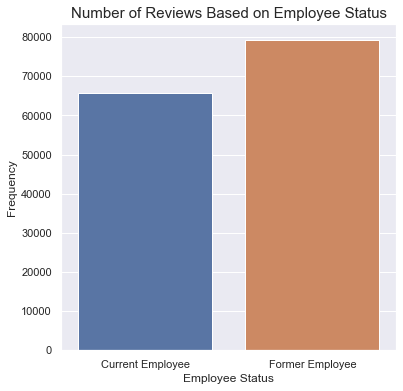

In [73]:
make_count_plot(df['Employee Status'], 'Employee Status', 6, 6)

**Based on Year**

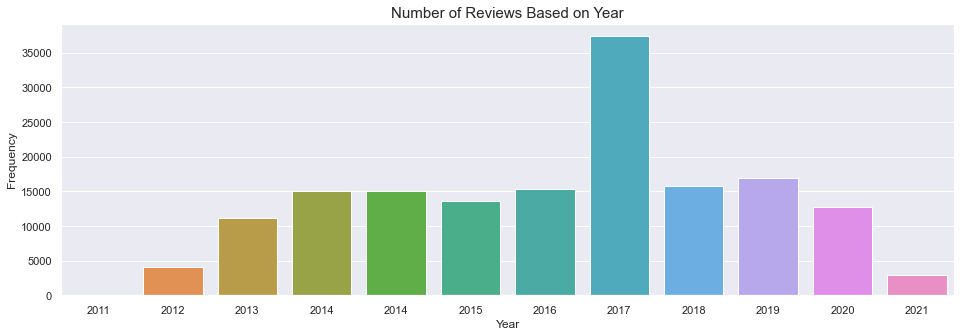

In [74]:
make_count_plot_order(df['Year'], 'Year', 16, 5, valid_year)

**Based on Month**

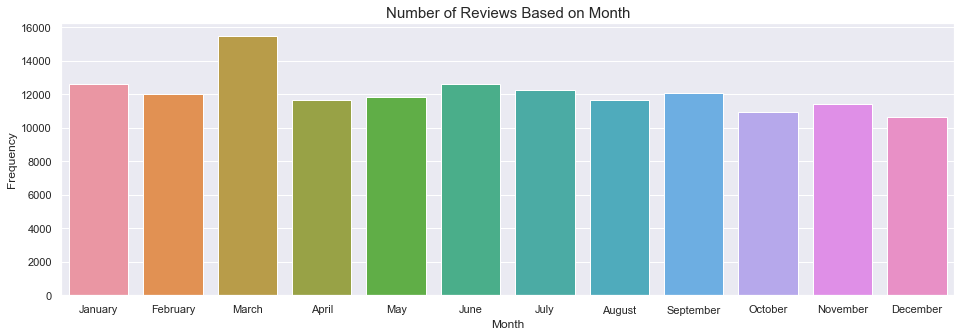

In [75]:
make_count_plot_order(df['Month'], 'Month', 16, 5, valid_month)

**Rating**

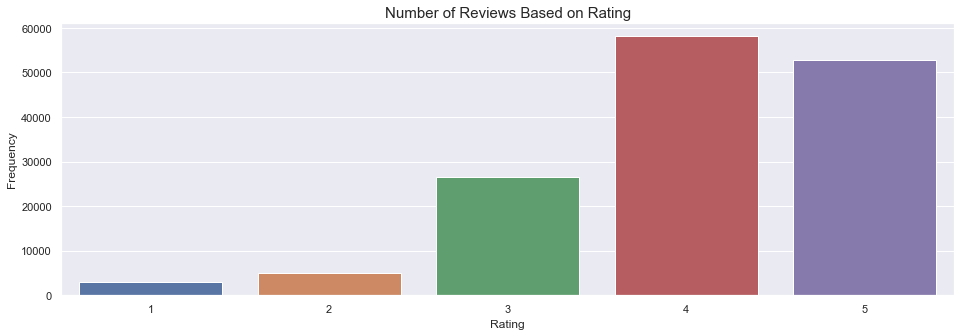

In [76]:
make_count_plot(df['Rating'], 'Rating', 16, 5)

**Company Name**

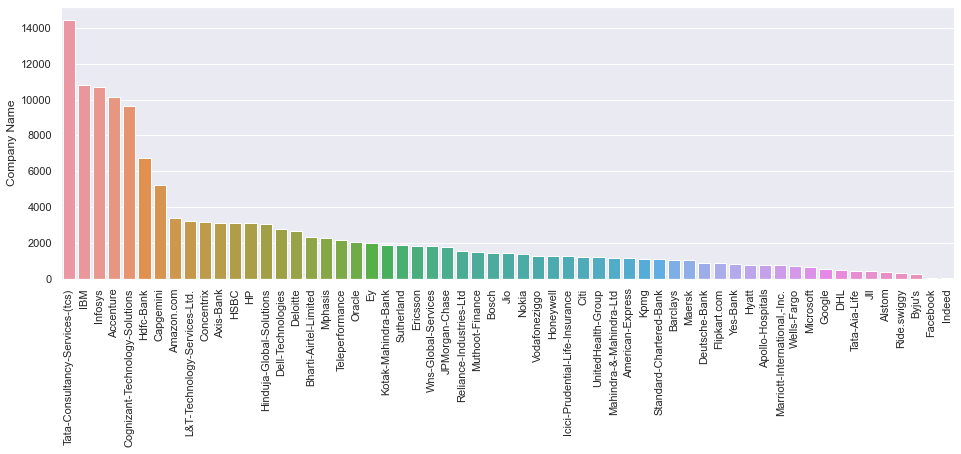

In [102]:
plt.figure(figsize=(16,5))
df_company = df['Company Name'].value_counts()
sns.barplot(x=df_company.index,
            y=df_company)
plt.xticks(rotation=90)
plt.show()

**Rating Based on Employee Status**

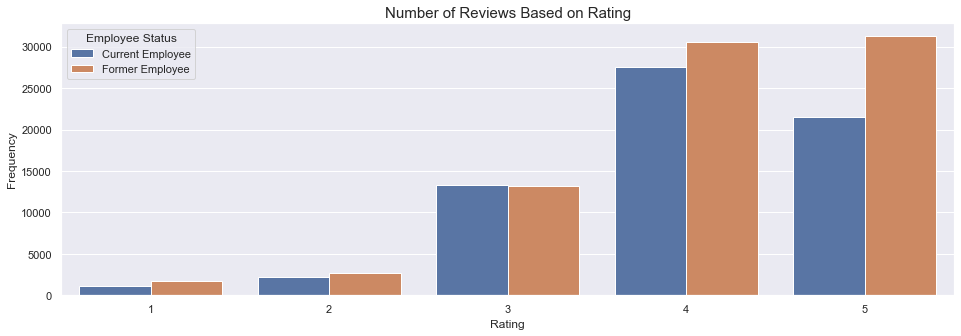

In [103]:
make_count_plot_hue(df['Rating'], 'Rating', 16, 5, hue=df['Employee Status'])

## Build Model

In [129]:
df['Category'] = df['Rating'].replace({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})

In [134]:
df = df.reset_index(drop=True)

In [138]:
df.head(3)

ReviewTitle  \
0                       Productive   
1                        Stressful   
2  Good Company for Every employee   

                                      CompleteReview  \
0  Good company, cool workplace, work load little...   
1  1. Need to work on boss's whims and fancies 2....   
2  Good company for every Engineers dream, Full M...   

                                                 URL  Rating  \
0  https://in.indeed.com/cmp/Reliance-Industries-...       3   
1  https://in.indeed.com/cmp/Reliance-Industries-...       3   
2  https://in.indeed.com/cmp/Reliance-Industries-...       5   

                                       ReviewDetails             Company Name  \
0  (Current Employee)  -  Ghansoli  -  August 30,...  Reliance-Industries-Ltd   
1          (Former Employee)  -   -  August 26, 2021  Reliance-Industries-Ltd   
2          (Former Employee)  -   -  August 17, 2021  Reliance-Industries-Ltd   

        Date  Year   Month Day   Employee Status  Category  
0 2021-08-30  2021  August  30  Current Employee   Neutral  
1 2021-08-26  2021  August  26   Former Employee   Neutral  
2 2021-08-17  2021  August  17   Former Employee  Positive

In [143]:
df['Category'].value_counts()

Positive    110796
Neutral      26465
Negative      7788
Name: Category, dtype: int64

In [139]:
df_category = pd.get_dummies(df['Category'])

In [140]:
df_category

Negative  Neutral  Positive
0              0        1         0
1              0        1         0
2              0        0         1
3              0        0         1
4              1        0         0
...          ...      ...       ...
145044         0        0         1
145045         0        0         1
145046         0        0         1
145047         0        1         0
145048         0        0         1

[145049 rows x 3 columns]

In [141]:
df_new = pd.concat([df['CompleteReview'], df_category], axis=1)

In [142]:
df_new

CompleteReview  Negative  Neutral  \
0       Good company, cool workplace, work load little...         0        1   
1       1. Need to work on boss's whims and fancies 2....         0        1   
2       Good company for every Engineers dream, Full M...         0        0   
3       I am just pass out bsc in chemistry Typical da...         0        0   
4       Not so fun at work just blame games  Target pe...         1        0   
...                                                   ...       ...      ...   
145044  We get a lot to learn in the company. Very sys...         0        0   
145045  Lot of scope to learn different technologies u...         0        0   
145046  An overall positive experience, nice environme...         0        0   
145047  Happy that I've started my career from such a ...         0        1   
145048  Got good experience and knowledge about my wor...         0        0   

        Positive  
0              0  
1              0  
2              1  
3              1  
4              0  
...          ...  
145044         1  
145045         1  
145046         1  
145047         0  
145048         1  

[145049 rows x 4 columns]

## Build Model Without Oversampling

In [145]:
review = df_new['CompleteReview'].values
category = df_new[['Negative', 'Neutral', 'Positive']].values

In [146]:
X_train, X_test, y_train, y_test = train_test_split(review, category, test_size=0.2, random_state=0)

In [148]:
tokenizer = Tokenizer(num_words=50000, oov_token='-')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_train)

pad_train = pad_sequences(sequence_train)
pad_test = pad_sequences(sequence_test)

**Callback**

In [ ]:
reduce_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.15,
    patience=5,
    min_lr=2.e-5
)

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

**Create Sequential Model**

In [ ]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Embedding(input_dim=50000, output_dim=64),
   tf.keras.layers.Dropout(0.4),
   tf.keras.layers.LSTM(64),
   tf.keras.layers.Dropout(0.3),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(6, activation='softmax')
])